In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import pandas_profiling as pp
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.image as mpimg

### Data Preparation

In [2]:
#read image
img=Image.open('/content/drive/MyDrive/Colab Notebooks/tiger.png')

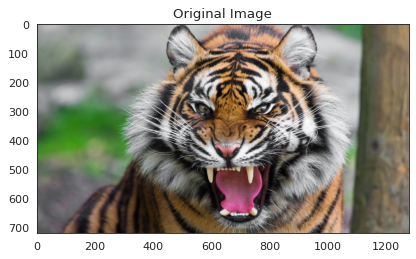

In [3]:
#plot image
plt.figure(figsize=(6,3.5),dpi=80)
plt.title('Original Image')
plt.imshow(img)

In [4]:
#Conveting image in RGB for each Pixels
img_np=np.array(img)

In [5]:
#look at image numerical
img_np[:3,:3,:3]

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160]],

       [[163, 159, 156],
        [164, 160, 157],
        [163, 162, 160]]], dtype=uint8)

In [6]:
#image size 720 * 1280 and 3 channel for RGB
img_np.shape   

(720, 1280, 3)

In [7]:
#create seperate features for RGB
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(921600, 3)

In [8]:
pixels

array([[164, 160, 159],
       [165, 161, 160],
       [164, 163, 161],
       ...,
       [119, 115, 106],
       [121, 117, 108],
       [122, 118, 109]], dtype=uint8)

### Data Modelling

In [9]:
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(n_clusters=16)

In [10]:
pixel_labels= model.labels_

In [11]:
pixel_labels.shape[0]

921600

In [12]:
cluster_centers=model.cluster_centers_

In [13]:
cluster_centers.shape

(16, 3)

In [14]:
final=np.zeros((pixel_labels.shape[0],3))
for cluster_no in range(16):
    #Go to the Pixel Label if it is 1 then replace it by cluster center 1(for 1 loop)
    final[pixel_labels==cluster_no]=cluster_centers[cluster_no]
final[0:5]

array([[153.54631364, 156.21606139, 154.51776897],
       [153.54631364, 156.21606139, 154.51776897],
       [153.54631364, 156.21606139, 154.51776897],
       [153.54631364, 156.21606139, 154.51776897],
       [153.54631364, 156.21606139, 154.51776897]])

In [15]:
#Bring RGB back in to original Shape
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(720, 1280, 3)

In [16]:
#Bringing Pixels back in to image
comp_image=Image.fromarray(np.uint8(comp_image))  

#Save Image
comp_image.save('tiger_compressed.png')  

In [18]:
#read original image
img_1 = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/tiger.png')

#Read Saved Image
img_2 = mpimg.imread('/content/tiger_compressed.png')  

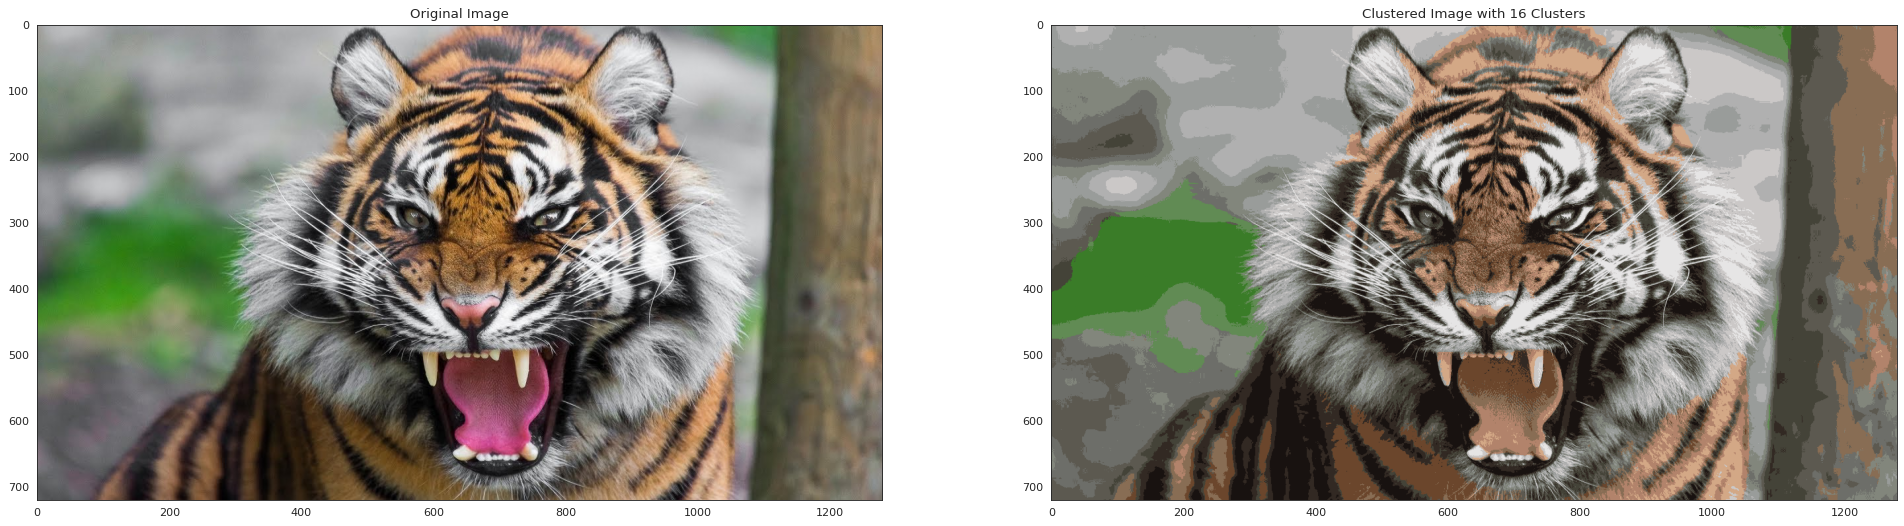

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(30,30),dpi=80)
ax1.imshow(img_1)
ax1.set_title('Original Image')
ax2.imshow(img_2)
ax2.set_title('Clustered Image with 16 Clusters')
plt.show()